# Exporting timeseries to Pastastore using hydropandas

This notebook shows how to use the `hydropandas` package to create a `PastaStore` from point observations. A `pastastore` is a combination of observations, stresses and `pastas` time series models.

## Contents<a id=top></a>

1. [Exporting oseries](#oseries)
2. [Exporting stresses](#stresses)
3. [Create and solve models](#models)
4. [Getting model results](#modelresults)

In [1]:
import pastastore as pst
import pandas as pd
import pastas as ps

import hydropandas as hpd

In [2]:
ps.set_log_level('ERROR')

## [Exporting oseries](#top)<a id=oseries></a>

In [3]:
extent = [117850, 117980, 439550, 439700]  # Schoonhoven zuid-west
dinozip = 'data/dino.zip'
oc_dino = hpd.ObsCollection.from_dino(dirname=dinozip, keep_all_obs=False)
oc_dino = oc_dino.loc[['B58A0092-004', 'B58A0092-005', 'B58A0102-001', 'B58A0167-001', 'B58A0212-001']]
oc_dino

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B58A0092-004,186924.0,372026.0,C:\Users\oebbe\AppData\Local\Temp\tmp7yvudjve\...,B58A0092,4.0,-115.23,-117.23,29.85,29.61,True,-----metadata------ name : B58A0092-004 x : 1...
B58A0092-005,186924.0,372026.0,C:\Users\oebbe\AppData\Local\Temp\tmp7yvudjve\...,B58A0092,5.0,-134.23,-137.23,29.84,29.62,True,-----metadata------ name : B58A0092-005 x : 1...
B58A0102-001,187900.0,373025.0,C:\Users\oebbe\AppData\Local\Temp\tmp7yvudjve\...,B58A0102,1.0,-3.35,-8.35,29.65,29.73,True,-----metadata------ name : B58A0102-001 x : 1...
B58A0167-001,185745.0,371095.0,C:\Users\oebbe\AppData\Local\Temp\tmp7yvudjve\...,B58A0167,1.0,23.33,22.33,30.50,30.21,True,-----metadata------ name : B58A0167-001 x : 1...
B58A0212-001,183600.0,373020.0,C:\Users\oebbe\AppData\Local\Temp\tmp7yvudjve\...,B58A0212,1.0,26.03,25.53,28.49,28.53,True,-----metadata------ name : B58A0212-001 x : 1...


In [4]:
oc_dino.stats.get_first_last_obs_date()

,date_first_measurement,date_last_measurement
name,,
B58A0092-004,1979-02-28,2018-07-31
B58A0092-005,1979-02-28,2014-12-31
B58A0102-001,1982-03-30,2000-06-14
B58A0167-001,1979-02-28,2002-02-28
B58A0212-001,1963-05-28,2001-11-28


In [21]:
# add observations to pastastore
pstore = oc_dino.to_pastastore()

## [Exporting stresses](#top)<a id=stresses></a>

In [22]:
tmintmax = pstore.get_tmin_tmax("oseries")

tmin = tmintmax.tmin.min()
tmax = tmintmax.tmax.max()

In [23]:
meteo_vars=('RH', 'EV24')
kinds = ('prec', 'evap')
knmi_oc = hpd.ObsCollection.from_knmi(locations=oc_dino, 
                                      meteo_vars=meteo_vars,
                                      start=[tmin, tmin], 
                                      end=[tmax,tmax], 
                                      ObsClass=[hpd.PrecipitationObs, hpd.EvaporationObs],
                                      cache=True)

In [24]:
knmi_oc

,x,y,filename,station,meteo_var,obs
name,,,,,,
RH_HEIBLOEM-L,189578.654040,366023.086600,,1967,RH,-----metadata------ name : RH_HEIBLOEM-L x : ...
RH_SOMEREN,175582.042578,377071.128150,,1904,RH,-----metadata------ name : RH_SOMEREN x : 175...
EV24_ELL,181488.403514,356704.652138,,377,EV24,-----metadata------ name : EV24_ELL x : 18148...


In [25]:
# add stresses to pastastore
for i, meteo_var in enumerate(meteo_vars):
    knmi_oc[knmi_oc.meteo_var==meteo_var].to_pastastore(pstore, obs_column=meteo_var, 
                                                        kind=kinds[i])

## [Creating and solving models](#top)<a id=models></a>

In [27]:
pstore.create_models_bulk(store=True, add_recharge=True, ignore_errors=False);

Bulk creation models:   0%|                                                                      | 0/5 [00:00<?, ?it/s]INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:Inferred frequency for time series RH_HEIBLOEM-L: freq=D
INFO:pastas.timeseries:Inferred frequency for time series EV24_ELL: freq=D
Bulk creation models:  20%|████████████▍                                                 | 1/5 [00:00<00:00,  9.63it/s]INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-005: freq=None. The time series is irregular.
INFO:pastas.timeseries:Time Series B58A0092-005: 3 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:Inferred frequency for time series RH_HEIBLOEM-L: freq=D
I

In [28]:
pstore.solve_models()

Solving models:   0%|                                                                            | 0/5 [00:00<?, ?it/s]INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:User provided frequency for time series RH_HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series EV24_ELL: freq=D
Solving models:  20%|█████████████▌                                                      | 1/5 [00:01<00:04,  1.03s/it]INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-005: freq=None. The time series is irregular.
INFO:pastas.timeseries:Time Series B58A0092-005: 3 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:User provided frequency for time series RH_HEIBL

## [Getting model results](#top)<a id=modelresults></a>

In [29]:
pstore.get_statistics(["evp"])

INFO:pastas.timeseries:Nan-values were removed at the end of the time series B58A0092-004.
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-004: freq=None. The time series is irregular.
INFO:pastas.timeseries:Time Series B58A0092-004: 13 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:User provided frequency for time series RH_HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series EV24_ELL: freq=D
INFO:pastas.timeseries:Cannot determine frequency of series B58A0092-005: freq=None. The time series is irregular.
INFO:pastas.timeseries:Time Series B58A0092-005: 3 nan-value(s) was/were found and filled with: drop.
INFO:pastas.timeseries:User provided frequency for time series RH_HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series EV24_ELL: freq=D
INFO:pastas.timeseries:Cannot determine frequency of series B58A0102-001: freq=None. The time series is irregular.
INFO:pastas.timeseries:User p

B58A0092-004    49.551608
B58A0092-005    51.546665
B58A0102-001    87.633610
B58A0167-001    78.805760
B58A0212-001    70.902518
Name: evp, dtype: float64

INFO:pastas.timeseries:Cannot determine frequency of series B58A0167-001: freq=None. The time series is irregular.
INFO:pastas.timeseries:User provided frequency for time series RH_HEIBLOEM-L: freq=D
INFO:pastas.timeseries:User provided frequency for time series EV24_ELL: freq=D


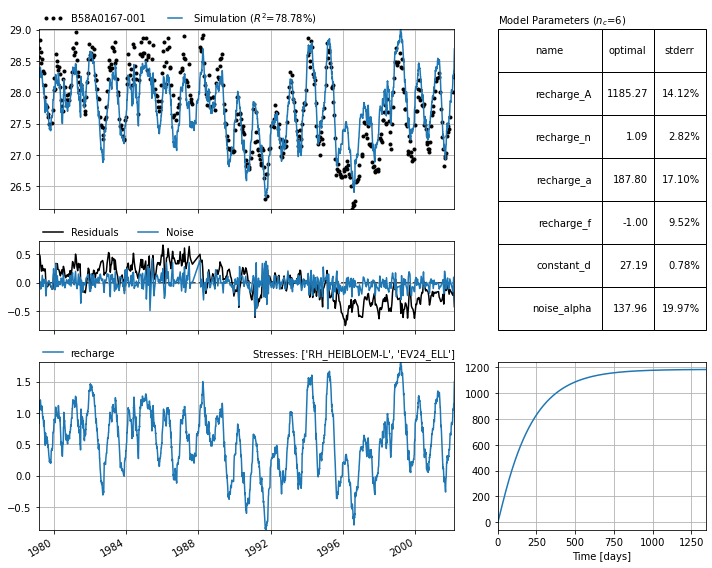

In [30]:
# results from a single model
ml1 = pstore.get_models('B58A0167-001')
ml1.plots.results();